In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

In [2]:
df=pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service



In [3]:
df.custcat.value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [13]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [12]:
#check for null values 
for i in df.columns.values:
    print(i)
    print(df[i].isnull().value_counts(),end="\n \n")

region
False    1000
Name: region, dtype: int64
 
tenure
False    1000
Name: tenure, dtype: int64
 
age
False    1000
Name: age, dtype: int64
 
marital
False    1000
Name: marital, dtype: int64
 
address
False    1000
Name: address, dtype: int64
 
income
False    1000
Name: income, dtype: int64
 
ed
False    1000
Name: ed, dtype: int64
 
employ
False    1000
Name: employ, dtype: int64
 
retire
False    1000
Name: retire, dtype: int64
 
gender
False    1000
Name: gender, dtype: int64
 
reside
False    1000
Name: reside, dtype: int64
 
custcat
False    1000
Name: custcat, dtype: int64
 


no null values

In [26]:
#feature=x  label=y
x = df.drop(["custcat"],axis=1)
y=df["custcat"]


# normalise data 

In [39]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))


array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# classification 

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)


In [51]:
ypred = knn.predict(x_test) #prediction  


Accuracy evaluation

In [53]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred))

Train set Accuracy:  0.54375
Test set Accuracy:  0.325


## accuracy graph on different values of neighbour

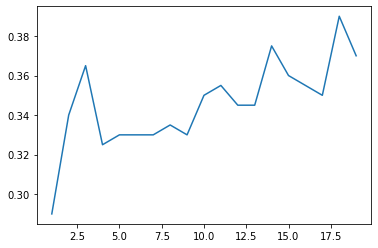

In [46]:

k_range=list(range(1,20))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range,scores)
plt.show()